# Credit Card Fraud Detection - Exploratory Data Analysis

**Student:** Caleb Hodel  
**Course:** MAT 311  
**Date:** October 24, 2025

## Overview
This notebook performs an exploratory data analysis on credit card transaction data to identify patterns and characteristics of fraudulent transactions. All code is generated using GitHub Copilot using **Claude Sonnet 4.5**.

## Setup: Import Libraries and Load Data

**Prompt:** "Import required libraries (pandas, numpy, matplotlib, seaborn, scipy) and load the credit card transaction dataset from card_transdata.csv"

In [85]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the credit card transaction dataset
credit_card_data = pd.read_csv('card_transdata.csv')

# Display basic information
print("Dataset loaded successfully!")
print(f"Shape: {credit_card_data.shape}")
credit_card_data.head()

Dataset loaded successfully!
Shape: (999, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


### Dataset Dimensions

**Prompt:** "Display the shape of the dataset showing number of rows (transactions), columns (features), and total data points"

In [86]:
# Display the shape of the dataset
print("Dataset Shape:")
print(f"Rows (transactions): {credit_card_data.shape[0]:,}")
print(f"Columns (features): {credit_card_data.shape[1]}")
print(f"Total data points: {credit_card_data.shape[0] * credit_card_data.shape[1]:,}")

Dataset Shape:
Rows (transactions): 999
Columns (features): 8
Total data points: 7,992


### Summary Statistics

**Prompt:** "Generate summary statistics for all features in the dataset using describe()"

In [87]:
# Display summary statistics for all features
credit_card_data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,999.000000,996.000000,997.000000,992.000000,995.000000,997.000000,995.000000,999.000000
mean,26.876607,5.437319,1.655069,0.892137,0.313568,0.117352,0.673367,0.079079
std,63.899697,35.668094,2.351386,0.310364,0.464176,0.322001,0.469218,0.269997
min,0.104184,0.001448,0.016933,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.990543,0.306441,0.468123,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.340321,0.958539,0.955504,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.393952,3.137259,1.922025,1.000000,1.000000,0.000000,1.000000,0.000000
max,965.910612,990.070315,36.074366,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Preview

**Prompt:** "Display the first few rows of the dataset to understand the data structure"

In [88]:
# Display the first few rows of the dataset
credit_card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


### Column Information

**Prompt:** "Display the column names, data types, and check for null values in the dataset"

In [89]:
# Display column names, data types, and null value information
print("Dataset Information:")
print("=" * 70)
credit_card_data.info()
print("\n" + "=" * 70)
print(f"\nColumn Names: {list(credit_card_data.columns)}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


Column Names: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


### Missing Values Analysis

**Prompt:** "Check for missing values in each column and calculate the percentage of missing data"

In [90]:
# Check for missing values
missing_values = credit_card_data.isnull().sum()
missing_percentage = (credit_card_data.isnull().sum() / len(credit_card_data)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage.round(2)
})

print("Missing Values Summary:")
print("=" * 70)
print(missing_summary)
print(f"\nTotal missing values: {credit_card_data.isnull().sum().sum()}")

Missing Values Summary:
                                Missing_Count  Missing_Percentage
distance_from_home                          0                 0.0
distance_from_last_transaction              3                 0.3
ratio_to_median_purchase_price              2                 0.2
repeat_retailer                             7                 0.7
used_chip                                   4                 0.4
used_pin_number                             2                 0.2
online_order                                4                 0.4
fraud                                       0                 0.0

Total missing values: 22


### Data Cleaning: Remove Missing Values

**Prompt:** "Drop all rows with missing values and save the cleaned data in a new dataframe called clean_credit_card_data"

In [91]:
# Drop all rows with missing values
clean_credit_card_data = credit_card_data.dropna()

# Display information about the cleaned dataset
print("Data Cleaning Summary:")
print("=" * 70)
print(f"Original dataset size: {credit_card_data.shape[0]:,} rows")
print(f"Cleaned dataset size: {clean_credit_card_data.shape[0]:,} rows")
print(f"Rows removed: {credit_card_data.shape[0] - clean_credit_card_data.shape[0]:,}")
print(f"Percentage of data retained: {(clean_credit_card_data.shape[0] / credit_card_data.shape[0] * 100):.2f}%")
print("\n" + "=" * 70)
print(f"\nVerifying no missing values remain: {clean_credit_card_data.isnull().sum().sum()} missing values")

Data Cleaning Summary:
Original dataset size: 999 rows
Cleaned dataset size: 977 rows
Rows removed: 22
Percentage of data retained: 97.80%


Verifying no missing values remain: 0 missing values


### Preview of Clean Dataset

**Prompt:** "Display the first few rows of the clean_credit_card_data to verify the cleaned data". From this point forward we are only interested in the clean data set.

In [92]:
# Display the first few rows of the clean dataset
print("Clean Credit Card Data - First 10 Rows:")
print("=" * 70)
clean_credit_card_data.head(10)

Clean Credit Card Data - First 10 Rows:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0
11,13.592368,0.240540,1.370330,1.0,1.0,0.0,1.0,0


## Exploratory Data Analysis: Visualizations

### Fraud Class Distribution

**Prompt:** "Visualize the distribution of fraud vs non-fraud transactions using a count plot and display the counts and percentages, title the plot 'Fraud Class Distribution'"

Fraud Class Distribution:
Non-Fraud (0): 901 transactions (92.22%)
Fraud (1): 76 transactions (7.78%)

Class Imbalance Ratio: 11.86:1


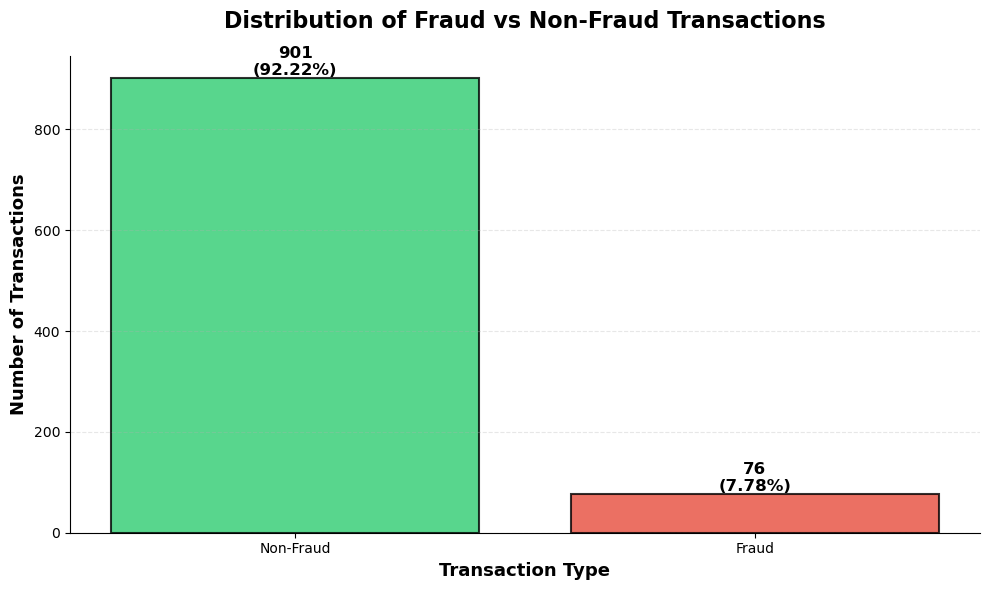

In [93]:
# Calculate fraud class distribution
fraud_counts = clean_credit_card_data['fraud'].value_counts().sort_index()
fraud_percentages = clean_credit_card_data['fraud'].value_counts(normalize=True).sort_index() * 100

# Display fraud statistics
print("Fraud Class Distribution:")
print("=" * 70)
print(f"Non-Fraud (0): {fraud_counts[0]:,} transactions ({fraud_percentages[0]:.2f}%)")
print(f"Fraud (1): {fraud_counts[1]:,} transactions ({fraud_percentages[1]:.2f}%)")
print(f"\nClass Imbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.2f}:1")
print("=" * 70)

# Create cleaner visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ecc71', '#e74c3c']  # Green for non-fraud, Red for fraud
bars = ax.bar(['Non-Fraud', 'Fraud'], fraud_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Customize the plot
ax.set_title('Distribution of Fraud vs Non-Fraud Transactions', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Transaction Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, fraud_counts.values, fraud_percentages.values)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({pct:.2f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### Used PIN Number Distribution

**Prompt:** "Visualize the used pin variable distribution"

PIN Usage Distribution:
No PIN: 860 transactions (88.02%)
PIN Used: 117 transactions (11.98%)


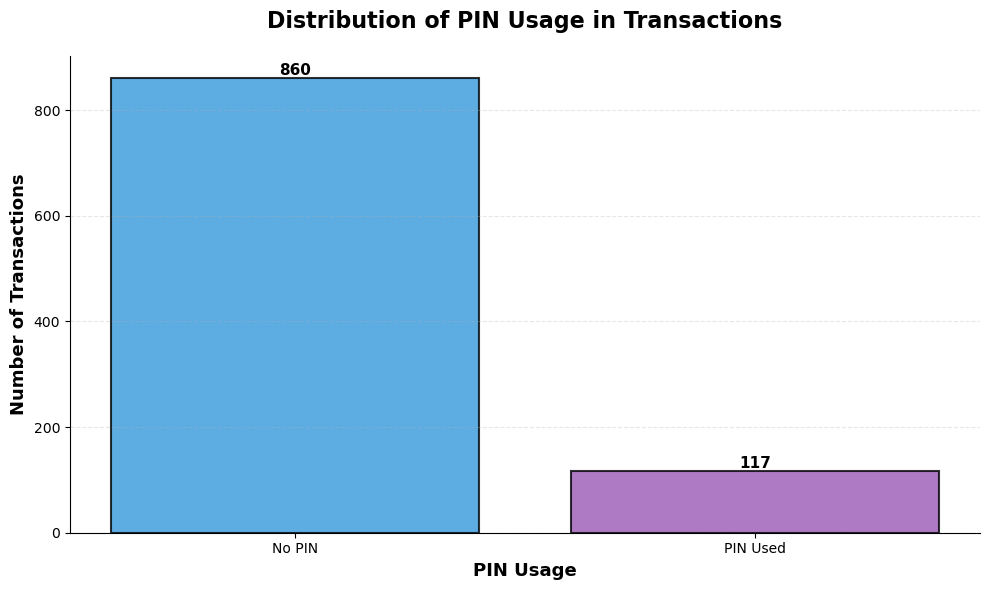

In [94]:
# Calculate PIN usage distribution
pin_counts = clean_credit_card_data['used_pin_number'].value_counts()
pin_percentages = (pin_counts / len(clean_credit_card_data)) * 100

print("PIN Usage Distribution:")
print("=" * 70)
for pin_used, count in pin_counts.items():
    pct = pin_percentages[pin_used]
    label = "PIN Used" if pin_used == 1 else "No PIN"
    print(f"{label}: {count} transactions ({pct:.2f}%)")
print("=" * 70)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#3498db', '#9b59b6']
bars = ax.bar(['No PIN', 'PIN Used'], pin_counts.values, color=colors, alpha=0.8, 
               edgecolor='black', linewidth=1.5)

# Customize the plot
ax.set_title('Distribution of PIN Usage in Transactions', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('PIN Usage', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Repeat Retailer Distribution

**Prompt:** "Do the same thing but for repeat retailer distribution"

Repeat Retailer Distribution:
Repeat Retailer: 874 transactions (89.46%)
New Retailer: 103 transactions (10.54%)


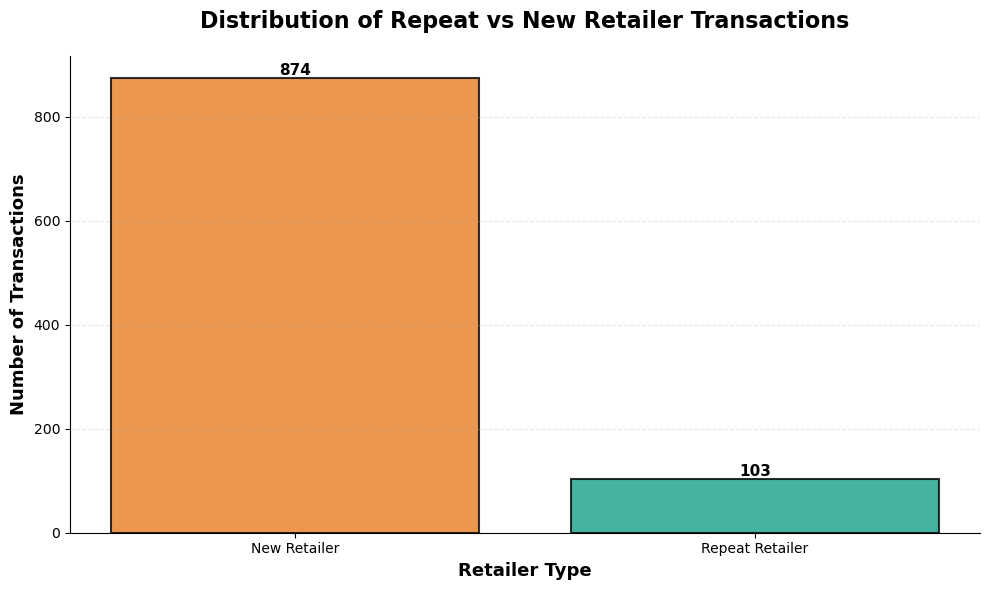

In [95]:
# Calculate repeat retailer distribution
retailer_counts = clean_credit_card_data['repeat_retailer'].value_counts()
retailer_percentages = (retailer_counts / len(clean_credit_card_data)) * 100

print("Repeat Retailer Distribution:")
print("=" * 70)
for is_repeat, count in retailer_counts.items():
    pct = retailer_percentages[is_repeat]
    label = "Repeat Retailer" if is_repeat == 1 else "New Retailer"
    print(f"{label}: {count} transactions ({pct:.2f}%)")
print("=" * 70)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e67e22', '#16a085']
bars = ax.bar(['New Retailer', 'Repeat Retailer'], retailer_counts.values, color=colors, 
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Customize the plot
ax.set_title('Distribution of Repeat vs New Retailer Transactions', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Retailer Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Online Order Distribution

**Prompt:** "Visualize the online order distribution"

Online Order Distribution:
Online Order: 658 transactions (67.35%)
In-Person Order: 319 transactions (32.65%)


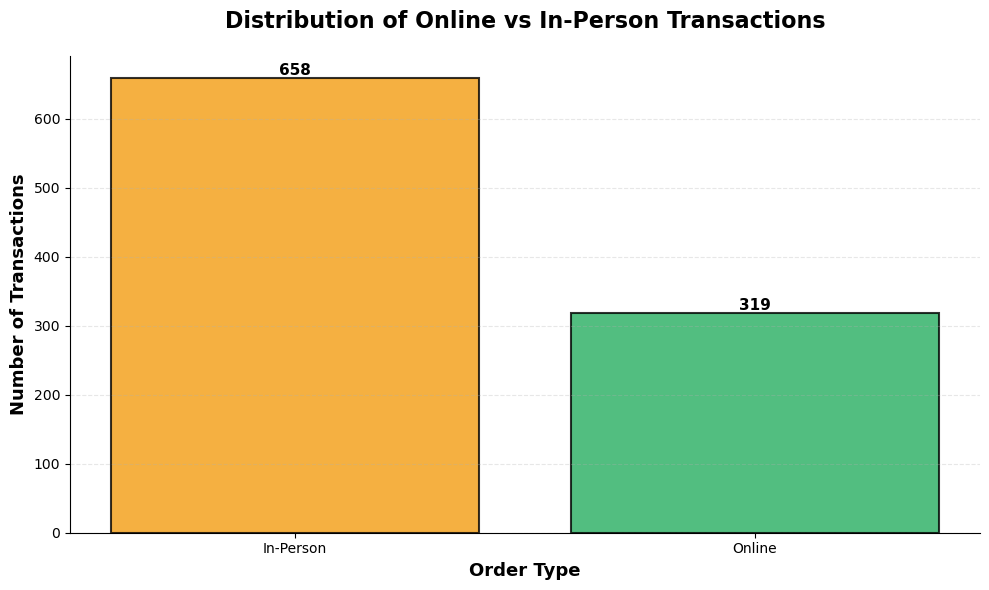

In [96]:
# Calculate online order distribution
online_counts = clean_credit_card_data['online_order'].value_counts()
online_percentages = (online_counts / len(clean_credit_card_data)) * 100

print("Online Order Distribution:")
print("=" * 70)
for is_online, count in online_counts.items():
    pct = online_percentages[is_online]
    label = "Online Order" if is_online == 1 else "In-Person Order"
    print(f"{label}: {count} transactions ({pct:.2f}%)")
print("=" * 70)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#f39c12', '#27ae60']
bars = ax.bar(['In-Person', 'Online'], online_counts.values, color=colors, 
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Customize the plot
ax.set_title('Distribution of Online vs In-Person Transactions', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Order Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Ratio to Median Purchase Price Distribution

**Prompt:** "Visualize the distribution of ratio of median purchase price"

Ratio to Median Purchase Price Statistics:
count    977.000000
mean       1.654003
std        2.367687
min        0.016933
25%        0.466144
50%        0.944871
75%        1.921046
max       36.074366
Name: ratio_to_median_purchase_price, dtype: float64


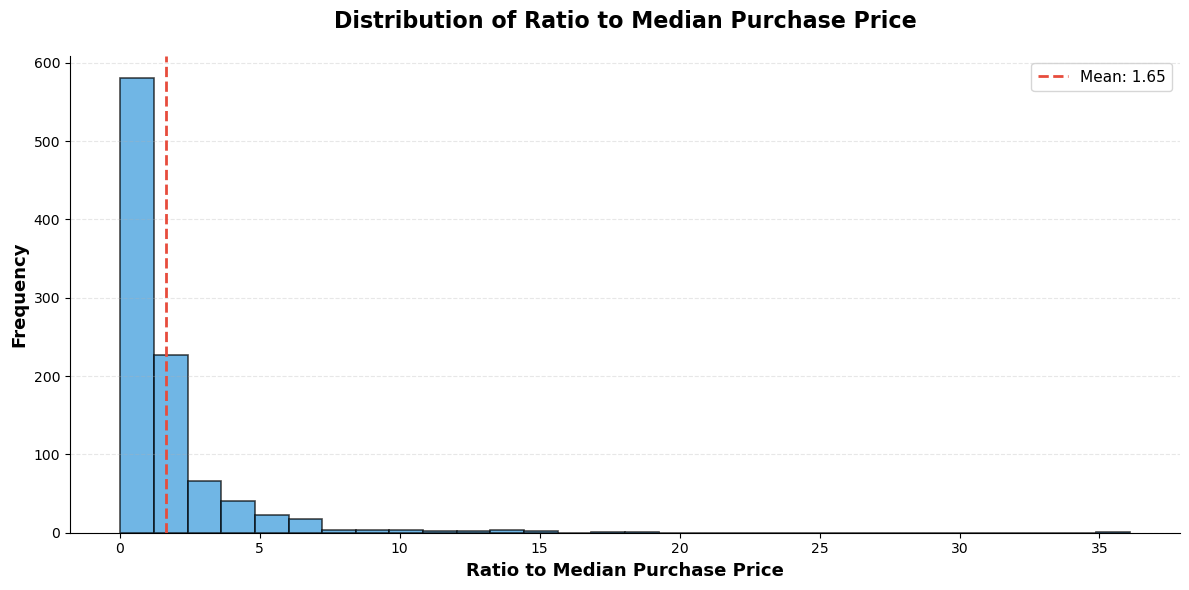

In [97]:
# Get statistics for ratio to median purchase price
ratio_stats = clean_credit_card_data['ratio_to_median_purchase_price'].describe()

print("Ratio to Median Purchase Price Statistics:")
print("=" * 70)
print(ratio_stats)
print("=" * 70)

# Create histogram
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(clean_credit_card_data['ratio_to_median_purchase_price'], bins=30, 
        color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)

# Add mean line
mean_val = clean_credit_card_data['ratio_to_median_purchase_price'].mean()
ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_val:.2f}')

# Customize the plot
ax.set_title('Distribution of Ratio to Median Purchase Price', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Ratio to Median Purchase Price', fontsize=13, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

## Bivariate Analysis: Fraud vs Features

### Fraud by PIN Usage

**Prompt:** "Create a count plot showing the breakdown of fraudulent vs non-fraudulent transactions based on whether PIN was used"

Fraud Distribution by PIN Usage:
fraud              0   1
used_pin_number         
0.0              784  76
1.0              117   0


Fraud Rate (%) by PIN Usage:
fraud                     0         1
used_pin_number                      
0.0               91.162791  8.837209
1.0              100.000000  0.000000


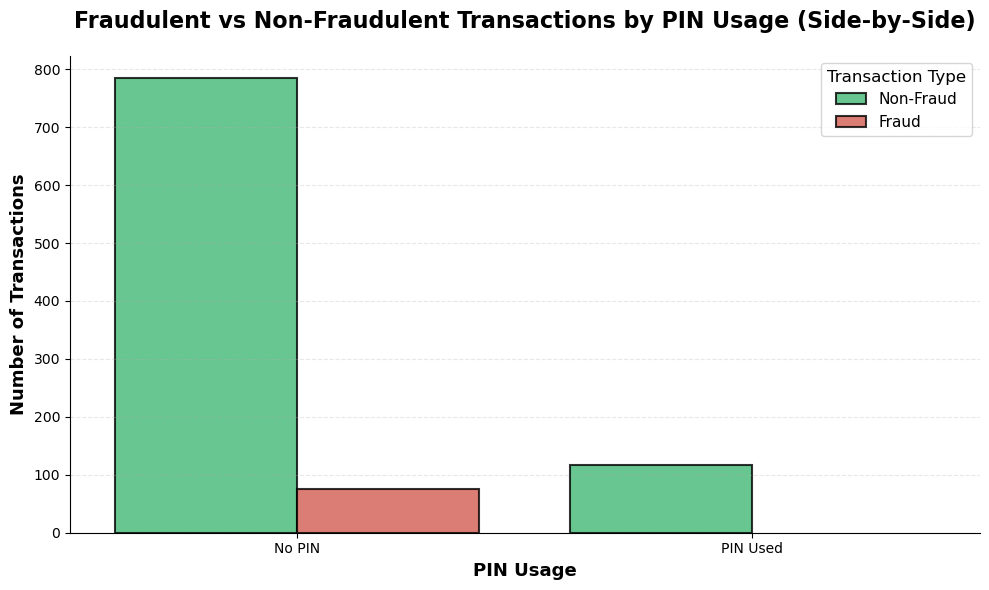

In [98]:
# Create crosstab to analyze fraud by PIN usage
fraud_by_pin = pd.crosstab(clean_credit_card_data['used_pin_number'], 
                             clean_credit_card_data['fraud'])

print("Fraud Distribution by PIN Usage:")
print("=" * 70)
print(fraud_by_pin)
print("\n" + "=" * 70)

# Calculate fraud rates for each PIN category
fraud_rates = pd.crosstab(clean_credit_card_data['used_pin_number'], 
                           clean_credit_card_data['fraud'], 
                           normalize='index') * 100
print("\nFraud Rate (%) by PIN Usage:")
print(fraud_rates)
print("=" * 70)

# Create side-by-side count plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=clean_credit_card_data, x='used_pin_number', hue='fraud', 
              palette=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=1.5, ax=ax)

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by PIN Usage (Side-by-Side)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('PIN Usage', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No PIN', 'PIN Used'])
ax.legend(title='Transaction Type', labels=['Non-Fraud', 'Fraud'], fontsize=11, title_fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Fraud by PIN Usage - Stacked View

**Prompt:** "Create a stacked bar chart showing the same fraud by PIN usage data to better visualize proportions"

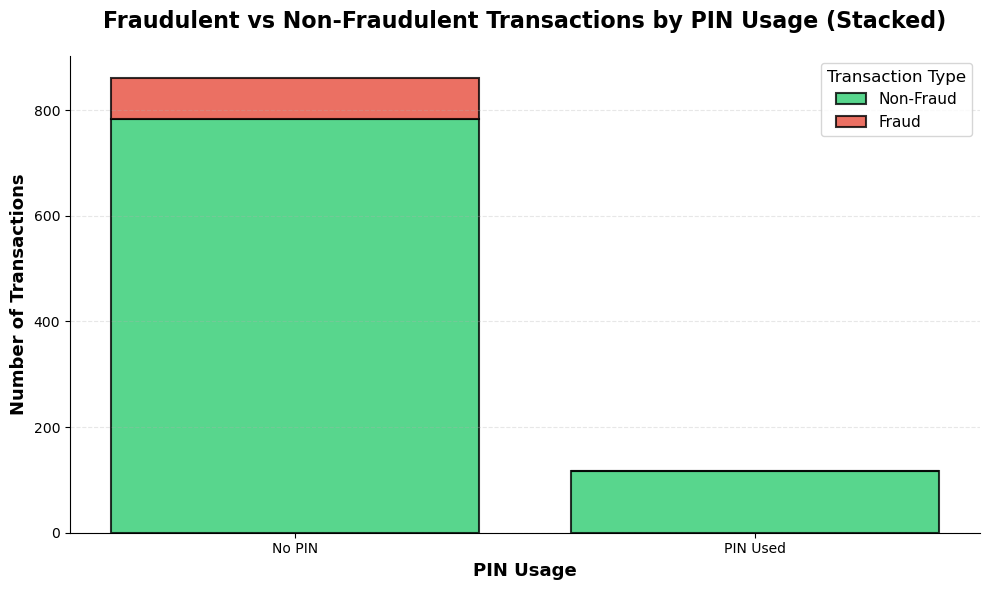

In [99]:
# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for stacked bar chart
pin_categories = ['No PIN', 'PIN Used']
non_fraud_counts = [fraud_by_pin.loc[0, 0], fraud_by_pin.loc[1, 0]]
fraud_counts_data = [fraud_by_pin.loc[0, 1], fraud_by_pin.loc[1, 1]]

# Create stacked bars
bars1 = ax.bar(pin_categories, non_fraud_counts, color='#2ecc71', alpha=0.8, 
               edgecolor='black', linewidth=1.5, label='Non-Fraud')
bars2 = ax.bar(pin_categories, fraud_counts_data, bottom=non_fraud_counts, 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5, label='Fraud')

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by PIN Usage (Stacked)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('PIN Usage', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.legend(title='Transaction Type', fontsize=11, title_fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Fraud by Chip Usage (Side-by-Side)

**Prompt:** "Create a count plot showing the breakdown of fraudulent vs non-fraudulent transactions based on whether the chip was used (side-by-side bar chart)"

Fraud Distribution by Chip Usage:
fraud        0   1
used_chip         
0.0        610  63
1.0        291  13


Fraud Rate (%) by Chip Usage:
fraud              0         1
used_chip                     
0.0        90.638930  9.361070
1.0        95.723684  4.276316


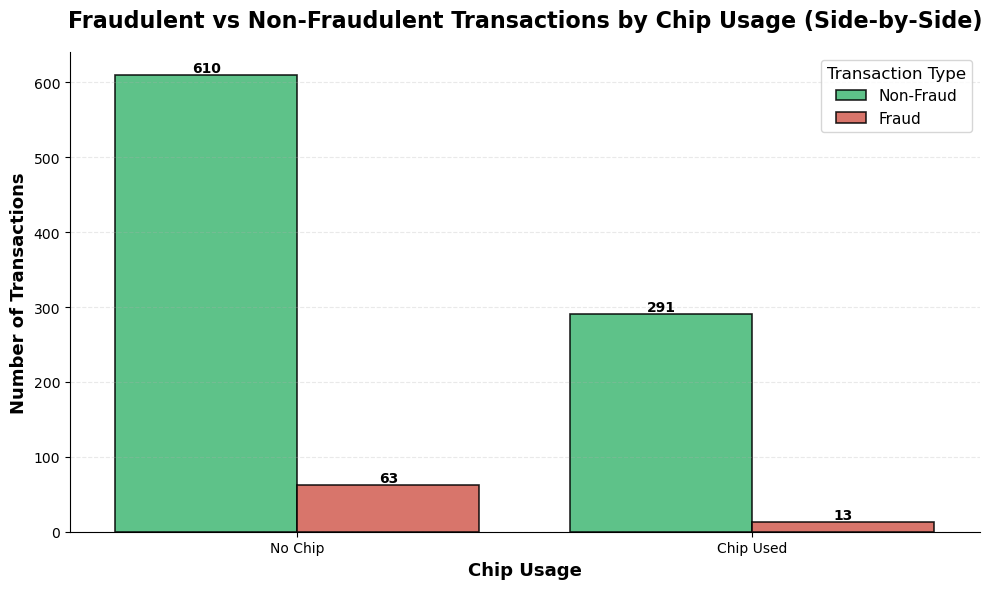

In [100]:
# Analyze fraud by chip usage and create side-by-side count plot
fraud_by_chip = pd.crosstab(clean_credit_card_data['used_chip'], clean_credit_card_data['fraud'])

print("Fraud Distribution by Chip Usage:")
print("=" * 70)
print(fraud_by_chip)
print("\n" + "=" * 70)

# Calculate fraud rates by chip usage
fraud_rates_chip = pd.crosstab(clean_credit_card_data['used_chip'], clean_credit_card_data['fraud'], normalize='index') * 100
print("\nFraud Rate (%) by Chip Usage:")
print(fraud_rates_chip)
print("=" * 70)

# Side-by-side count plot using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=clean_credit_card_data, x='used_chip', hue='fraud', 
              palette=['#2ecc71', '#e74c3c'], alpha=0.85, edgecolor='black', linewidth=1.2, ax=ax)

# Customize plot labels and appearance
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by Chip Usage (Side-by-Side)', fontsize=16, fontweight='bold', pad=18)
ax.set_xlabel('Chip Usage', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Chip', 'Chip Used'])
ax.legend(title='Transaction Type', labels=['Non-Fraud', 'Fraud'], fontsize=11, title_fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.28, linestyle='--')

# Annotate bar counts on the plot
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Fraud by Chip Usage - Stacked View

**Prompt:** "Create a stacked bar chart showing the same fraud by chip usage data to better visualize proportions"

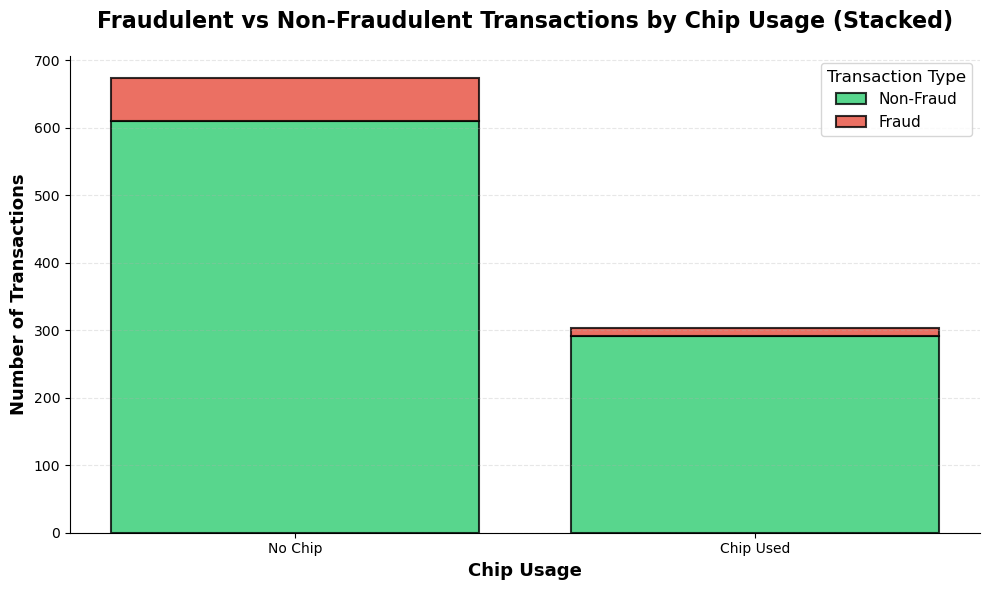

In [101]:
# Create stacked bar chart for fraud by chip usage
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for stacked bar chart
chip_categories = ['No Chip', 'Chip Used']
non_fraud_counts_chip = [fraud_by_chip.loc[0, 0], fraud_by_chip.loc[1, 0]]
fraud_counts_chip = [fraud_by_chip.loc[0, 1], fraud_by_chip.loc[1, 1]]

# Create stacked bars
bars1 = ax.bar(chip_categories, non_fraud_counts_chip, color='#2ecc71', alpha=0.8, 
               edgecolor='black', linewidth=1.5, label='Non-Fraud')
bars2 = ax.bar(chip_categories, fraud_counts_chip, bottom=non_fraud_counts_chip, 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5, label='Fraud')

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by Chip Usage (Stacked)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Chip Usage', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.legend(title='Transaction Type', fontsize=11, title_fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Fraud by Online Order (Side-by-Side)

**Prompt:** "Create a count plot showing the breakdown of fraudulent vs non-fraudulent transactions based on whether the order was online or in-person (side-by-side bar chart)"

Fraud Distribution by Online Order:
fraud           0   1
online_order         
0.0           317   2
1.0           584  74


Fraud Rate (%) by Online Order:
fraud                 0          1
online_order                      
0.0           99.373041   0.626959
1.0           88.753799  11.246201


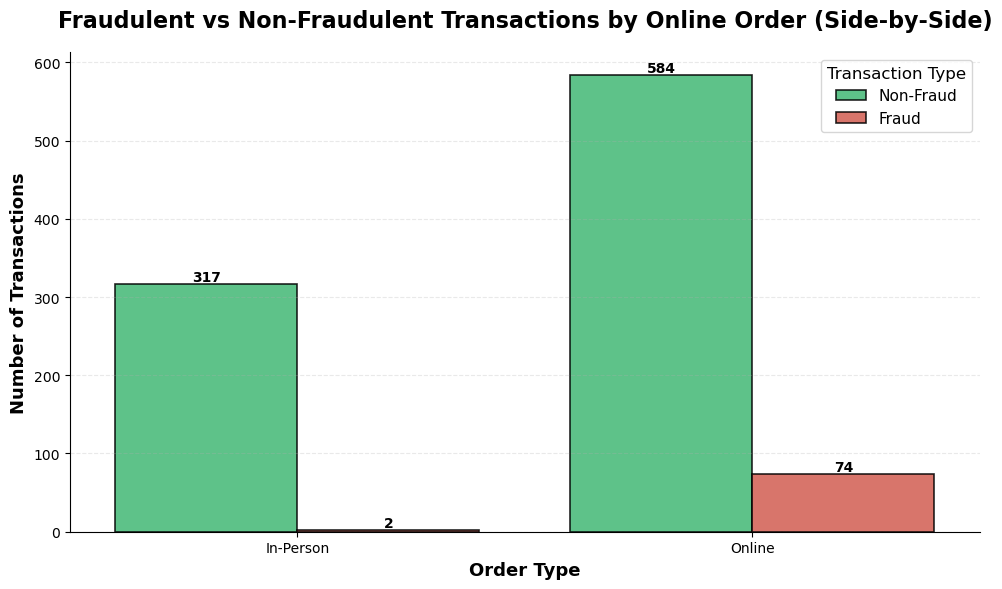

In [102]:
# Analyze fraud by online order and create side-by-side count plot
fraud_by_online = pd.crosstab(clean_credit_card_data['online_order'], clean_credit_card_data['fraud'])

print("Fraud Distribution by Online Order:")
print("=" * 70)
print(fraud_by_online)
print("\n" + "=" * 70)

# Calculate fraud rates by online order
fraud_rates_online = pd.crosstab(clean_credit_card_data['online_order'], clean_credit_card_data['fraud'], normalize='index') * 100
print("\nFraud Rate (%) by Online Order:")
print(fraud_rates_online)
print("=" * 70)

# Side-by-side count plot using seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=clean_credit_card_data, x='online_order', hue='fraud', 
              palette=['#2ecc71', '#e74c3c'], alpha=0.85, edgecolor='black', linewidth=1.2, ax=ax)

# Customize plot labels and appearance
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by Online Order (Side-by-Side)', fontsize=16, fontweight='bold', pad=18)
ax.set_xlabel('Order Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['In-Person', 'Online'])
ax.legend(title='Transaction Type', labels=['Non-Fraud', 'Fraud'], fontsize=11, title_fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.28, linestyle='--')

# Annotate bar counts on the plot
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Fraud by Online Order - Stacked View

**Prompt:** "Create a stacked bar chart showing the same fraud by online order data to better visualize proportions"

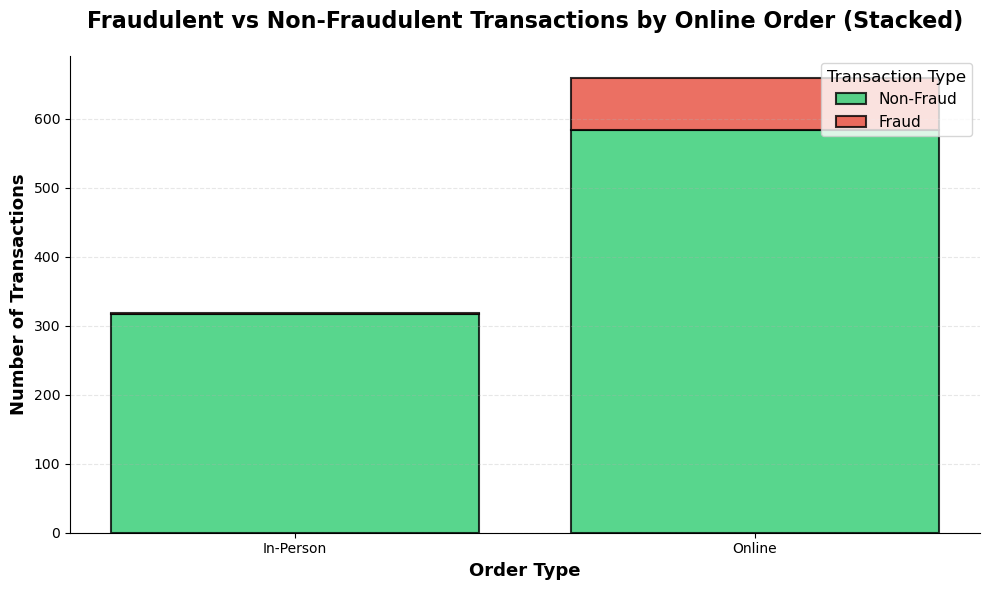

In [103]:
# Create stacked bar chart for fraud by online order
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for stacked bar chart
online_categories = ['In-Person', 'Online']
non_fraud_counts_online = [fraud_by_online.loc[0, 0], fraud_by_online.loc[1, 0]]
fraud_counts_online = [fraud_by_online.loc[0, 1], fraud_by_online.loc[1, 1]]

# Create stacked bars
bars1 = ax.bar(online_categories, non_fraud_counts_online, color='#2ecc71', alpha=0.8, 
               edgecolor='black', linewidth=1.5, label='Non-Fraud')
bars2 = ax.bar(online_categories, fraud_counts_online, bottom=non_fraud_counts_online, 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5, label='Fraud')

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions by Online Order (Stacked)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Order Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Transactions', fontsize=13, fontweight='bold')
ax.legend(title='Transaction Type', fontsize=11, title_fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### Scatter Plot: Distance from Last Transaction vs Ratio to Median Purchase Price

**Prompt:** "Create a scatter plot to show the breakdown of fraudulent and non-fraudulent transactions for distance_from_last_transaction vs ratio_to_median_purchase_price"

Summary Statistics by Fraud Status:

Non-Fraud Transactions:
  Distance from Last Transaction - Mean: 4.59, Median: 0.96
  Ratio to Median Purchase Price - Mean: 1.35, Median: 0.88

Fraud Transactions:
  Distance from Last Transaction - Mean: 12.92, Median: 0.91
  Ratio to Median Purchase Price - Mean: 5.21, Median: 4.88


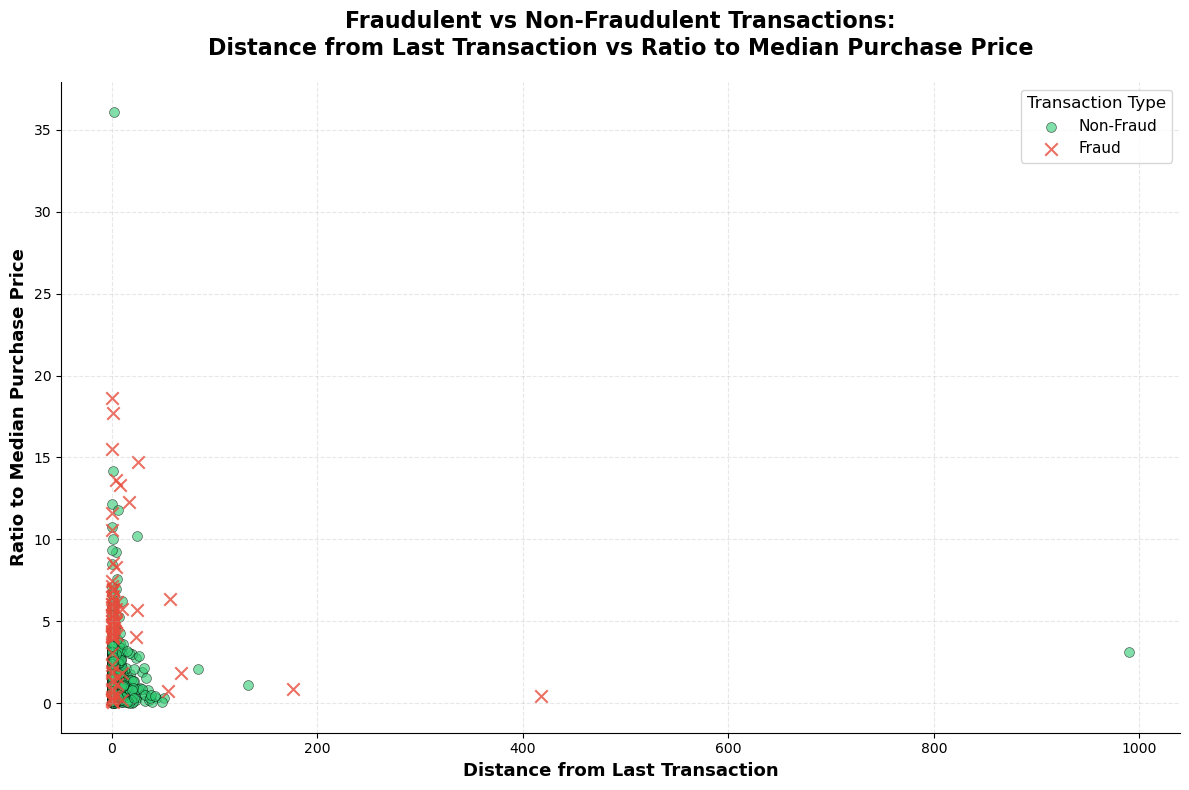

In [104]:
# Create scatter plot for distance from last transaction vs ratio to median purchase price
fig, ax = plt.subplots(figsize=(12, 8))

# Separate fraud and non-fraud transactions
fraud_transactions = clean_credit_card_data[clean_credit_card_data['fraud'] == 1]
non_fraud_transactions = clean_credit_card_data[clean_credit_card_data['fraud'] == 0]

# Plot non-fraud transactions
ax.scatter(non_fraud_transactions['distance_from_last_transaction'], 
           non_fraud_transactions['ratio_to_median_purchase_price'],
           c='#2ecc71', alpha=0.6, s=50, edgecolors='black', linewidth=0.5, label='Non-Fraud')

# Plot fraud transactions
ax.scatter(fraud_transactions['distance_from_last_transaction'], 
           fraud_transactions['ratio_to_median_purchase_price'],
           c='#e74c3c', alpha=0.8, s=80, label='Fraud', marker='x')

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions:\nDistance from Last Transaction vs Ratio to Median Purchase Price', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Distance from Last Transaction', fontsize=13, fontweight='bold')
ax.set_ylabel('Ratio to Median Purchase Price', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, title='Transaction Type', title_fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3, linestyle='--')

# Print summary statistics
print("Summary Statistics by Fraud Status:")
print("=" * 70)
print("\nNon-Fraud Transactions:")
print(f"  Distance from Last Transaction - Mean: {non_fraud_transactions['distance_from_last_transaction'].mean():.2f}, Median: {non_fraud_transactions['distance_from_last_transaction'].median():.2f}")
print(f"  Ratio to Median Purchase Price - Mean: {non_fraud_transactions['ratio_to_median_purchase_price'].mean():.2f}, Median: {non_fraud_transactions['ratio_to_median_purchase_price'].median():.2f}")

print("\nFraud Transactions:")
print(f"  Distance from Last Transaction - Mean: {fraud_transactions['distance_from_last_transaction'].mean():.2f}, Median: {fraud_transactions['distance_from_last_transaction'].median():.2f}")
print(f"  Ratio to Median Purchase Price - Mean: {fraud_transactions['ratio_to_median_purchase_price'].mean():.2f}, Median: {fraud_transactions['ratio_to_median_purchase_price'].median():.2f}")
print("=" * 70)

plt.tight_layout()
plt.show()

### Scatter Plot: Distance from Home vs Ratio to Median Purchase Price

**Prompt:** "Create a scatter plot of distance from home and ratio to median purchase price showing fraudulent and non-fraudulent transactions"

Summary Statistics by Fraud Status:

Non-Fraud Transactions:
  Distance from Home - Mean: 20.69, Median: 9.68
  Ratio to Median Purchase Price - Mean: 1.35, Median: 0.88

Fraud Transactions:
  Distance from Home - Mean: 88.38, Median: 18.95
  Ratio to Median Purchase Price - Mean: 5.21, Median: 4.88


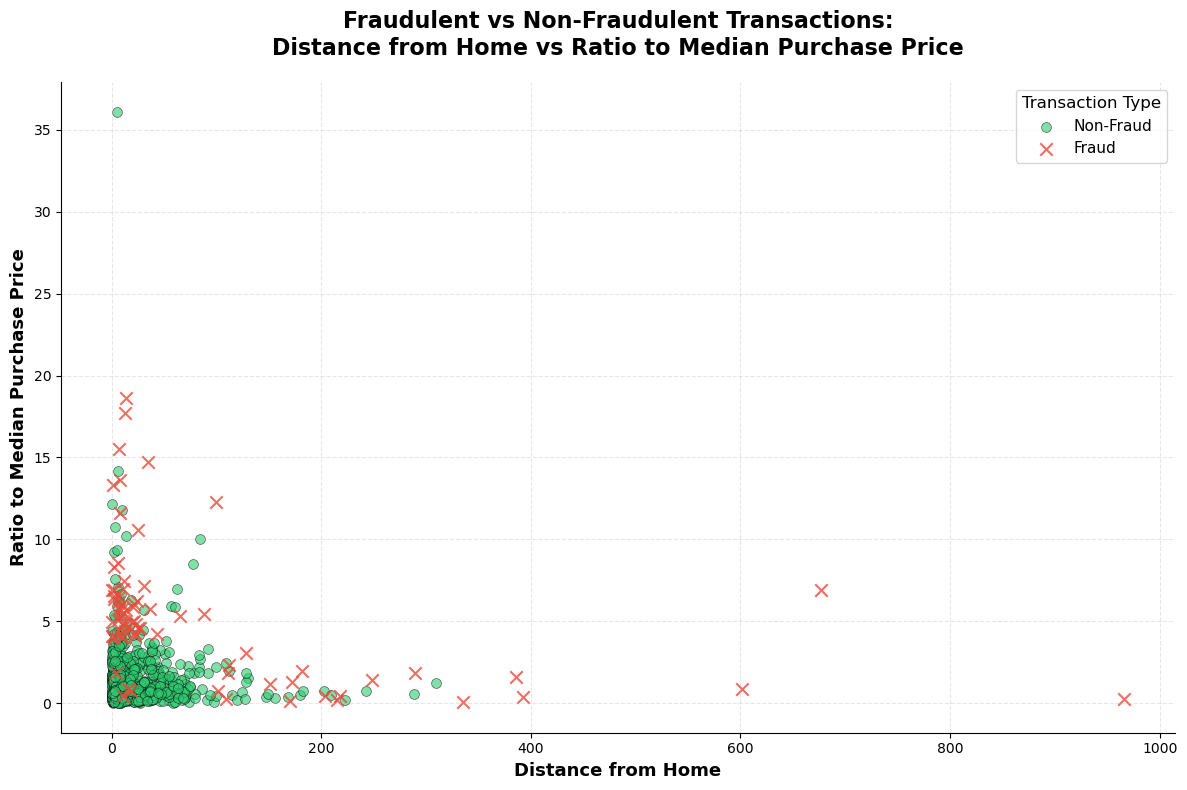

In [105]:
# Create scatter plot for distance from home vs ratio to median purchase price
fig, ax = plt.subplots(figsize=(12, 8))

# Plot non-fraud transactions
ax.scatter(non_fraud_transactions['distance_from_home'], 
           non_fraud_transactions['ratio_to_median_purchase_price'],
           c='#2ecc71', alpha=0.6, s=50, edgecolors='black', linewidth=0.5, label='Non-Fraud')

# Plot fraud transactions
ax.scatter(fraud_transactions['distance_from_home'], 
           fraud_transactions['ratio_to_median_purchase_price'],
           c='#e74c3c', alpha=0.8, s=80, label='Fraud', marker='x')

# Customize the plot
ax.set_title('Fraudulent vs Non-Fraudulent Transactions:\nDistance from Home vs Ratio to Median Purchase Price', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Distance from Home', fontsize=13, fontweight='bold')
ax.set_ylabel('Ratio to Median Purchase Price', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, title='Transaction Type', title_fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3, linestyle='--')

# Print summary statistics
print("Summary Statistics by Fraud Status:")
print("=" * 70)
print("\nNon-Fraud Transactions:")
print(f"  Distance from Home - Mean: {non_fraud_transactions['distance_from_home'].mean():.2f}, Median: {non_fraud_transactions['distance_from_home'].median():.2f}")
print(f"  Ratio to Median Purchase Price - Mean: {non_fraud_transactions['ratio_to_median_purchase_price'].mean():.2f}, Median: {non_fraud_transactions['ratio_to_median_purchase_price'].median():.2f}")

print("\nFraud Transactions:")
print(f"  Distance from Home - Mean: {fraud_transactions['distance_from_home'].mean():.2f}, Median: {fraud_transactions['distance_from_home'].median():.2f}")
print(f"  Ratio to Median Purchase Price - Mean: {fraud_transactions['ratio_to_median_purchase_price'].mean():.2f}, Median: {fraud_transactions['ratio_to_median_purchase_price'].median():.2f}")
print("=" * 70)

plt.tight_layout()
plt.show()